# 5. Segmentation 2 - Renal SPECT image

## First manual segmentation was performed using ITK-Snap

## Import manually segmented image from ITK-Snap (NIFTI format)

first needed to install the library using:

conda install -c conda-forge nibabel

I am using "nearly raw raster data" image format (.nrrd) in hospital projects, and this can be read in Python. 

In [34]:
import nibabel as nib
import matplotlib.pyplot as plt
im = nib.load('../../Images/PIGCT_seg.nii')
print(im)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 1)
affine: 
[[-1.  0.  0. -0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern

## When reading in the manual segmentation, the matrix is not aligned with the image. 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


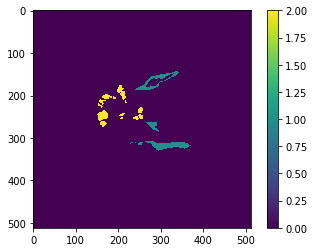

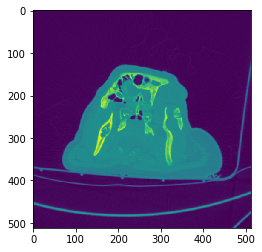

In [35]:
import imageio
data = im.get_data()
data = data[:,:,0]
print(data)

plt.imshow(data)
plt.colorbar()
plt.show()

pig = imageio.imread('../../Images/PIG_CT')
plt.imshow(pig)
plt.show()



## Transpose it to make it align.
Notice that the colormap contains integer gray-levels of 0 = background, 1 = bone, 2 = air (space between bones) (as per manual segmentation).

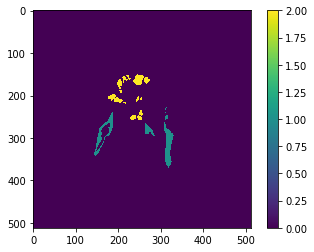

In [36]:
import numpy as np
data = np.transpose(data)
plt.imshow(data)
plt.colorbar()
plt.show()

### Mask for bone: Select only the pixels with value 1 = bone.  (see updated colormap)

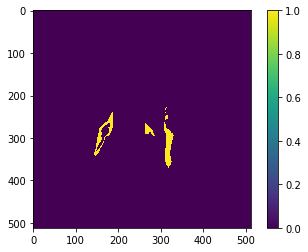

In [37]:
row,col = np.shape(data)

#  bone = np.where(condition, x, y)
#  the output array contains elements of x where condition is True, and elements from y elsewhere.
bone = np.where(data==1,1,0)

plt.imshow(bone)
plt.colorbar()
plt.show()



### Mask for air: Select only the pixels with value 2=air.  (see updated colormap)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


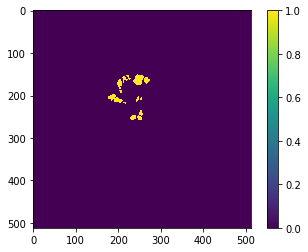

In [38]:
air = np.where(data==2,1,0)
print(air)
plt.imshow(air)
plt.colorbar()
plt.show()

## Select  pixels in image which are bone in the mask:

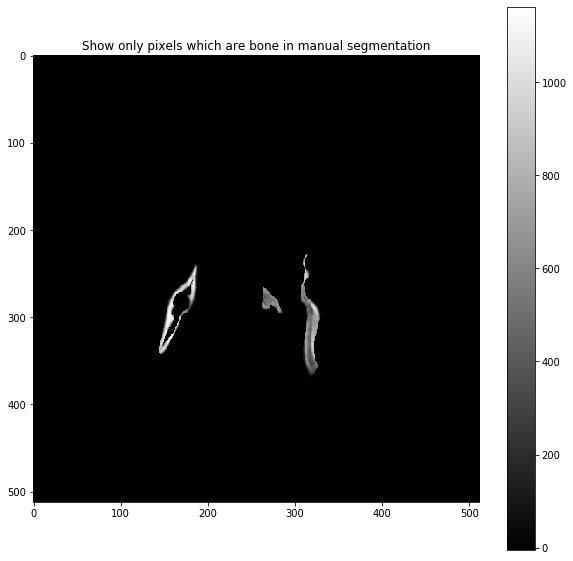

In [39]:
# Multiply bone mask with pig image
justbone = bone * pig
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,10))
pcm = ax1.imshow(justbone,cmap='gray')
ax1.set_title('Show only pixels which are bone in manual segmentation')
fig.colorbar(pcm, ax=ax1)


## Renal images - 
### Images Are More than Pictures, They Are Data.

Radiology. 2016 Feb;278(2):563-77. doi: 10.1148/radiol.2015151169. Epub 2015 Nov 18.
"Radiomics: Images Are More than Pictures, They Are Data.", Gillies et al. https://www.ncbi.nlm.nih.gov/pubmed/26579733

### Create Segmentation masks from manually segmented images

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


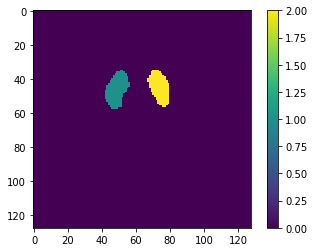

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


# Get Nifti kidney segmentation and show image.
im = nib.load('./Kidney_Areas.nii')
data = im.get_data()
I = data[:,:,30]
plt.imshow(I)
plt.colorbar()
plt.show()

### Now get right and left kidneys as separate masks:

Text(0.5, 1.0, 'Right Kidney')

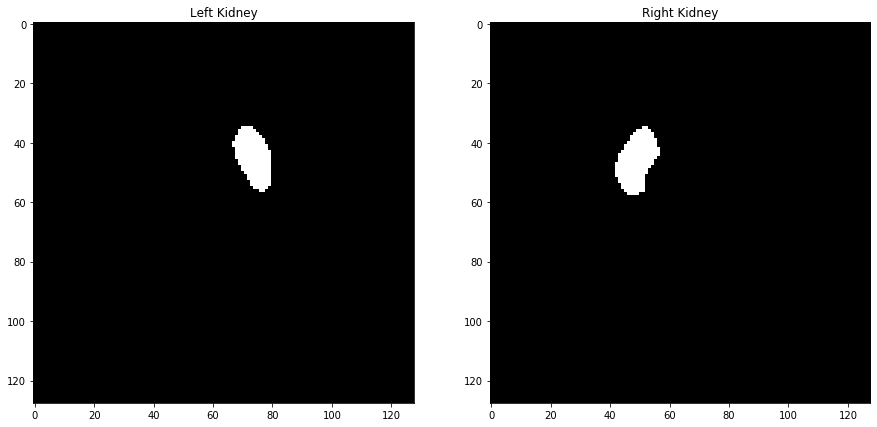

In [2]:
RightKid = np.where(I==1,1,0)
LeftKid = np.where(I==2,1,0)

fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(LeftKid,cmap='gray')
ax1.set_title(f'Left Kidney')
ax2.imshow(RightKid,cmap='gray')
ax2.set_title(f'Right Kidney')


### Read in kidney images.  

In [3]:
# Load data
Kid = nib.load('./Kidneys.nii')
data = Kid.get_data()
row,col,slices = np.shape(Kid)
print(f'row={row}, col={col}, slices={slices}')



row=128, col=128, slices=60
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


## Discard first 30 images:

In [4]:
# Notice change of name Kid -> Kim.  
#  We use Kim until the end of the code.
Kim = data[:,:,30:]

# Get dimensions of kidney image sequence
row,col,slices = np.shape(Kim)
print(f'row={row}, col={col}, slices={slices}')

row=128, col=128, slices=30


## Now blur in spatial dimension (x and y).

In [49]:
import cv2
from scipy import ndimage

def mediamBlur(img):
    rows,cols,slices = np.shape(img)
    tensorImg = np.zeros([rows, cols, slices])

    for i in range(0, slices):
        tensorImg[:, :, i] = ndimage.gaussian_filter(img[:,:,i], sigma = .5)
    return tensorImg


# Blank - for you to do it!

(128, 128, 30)


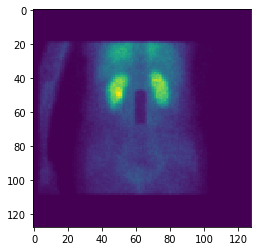

In [52]:
import numpy as np
# tensorImg = np.zeros([row, col, slices])
tensor = mediamBlur(Kim)

plt.imshow(tensor[:,:, 1])
print(tensorImg.shape)

## Blur in temporal dimension (along time with filter [1,2,1]/4)

In [59]:
# Blank - for you to do it!
import numpy as np 
from scipy import ndimage

fftKim = np.fft.fft2(Kim[:,:,3])

def fftGaussianBlur(imgFFT):
    rows,cols,slices = np.shape(imgFFT)
    tensorImg = np.zeros([rows, cols, slices])

    for i in range(0, slices):
        tensorImg[:, :, i] = ndimage.fourier_gaussian(imgFFT[:,:,i], sigma = .5)
    return tensorImg

## Now apply masks to image set.
### Loop through all remaining slices.
### for i in range(0,slices):

(128, 128, 30)


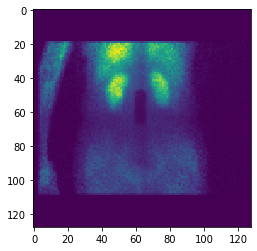

In [60]:
# Blank - for you to do it!
tensor = fftGaussianBlur(Kim)

plt.imshow(tensor[:,:, 1])
print(tensorImg.shape)

## Now sum the total values of pixels in (i) left and (ii) right masked kidneys.  This gives total count for each instant.

In [47]:
# Blank - for you to do it!

## Plot the results

In [48]:
# Blank - for you to do it!